📘 **Note Format Guide**

This format serves as a structured guide for organizing lecture content, personal interpretation, experiments, and study-related questions.

| Type | What It Means | When I Use It |
|------|----------------|----------------|
| 📝 Lecture | Original material from the professor’s notes | When I’m referencing core concepts or provided code |
| 🗣️ In-Class Note | Verbal explanations shared during the lecture | When I want to record something the professor said in class but didn’t include in the official notes |
| ✍️ My Note | My thoughts, interpretations, or additional explanations | When I reflect on or explain something in my own words |
| 🔬 Experiment | Code I tried out or changed to explore further | When I test variations or go beyond the original example |
| ❓ Question | Questions I had while studying | When I want to revisit or research something more deeply |

📝
🗣️
✍️
🔬
❓

# 1. 강의노트 원본 및 영상 링크

[https://guebin.github.io/DL2025/posts/07wk-2.html](https://guebin.github.io/DL2025/posts/07wk-2.html)

# 2. Imports 📝

In [1]:
import torch
import torchvision
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (4.5, 3.0)

# 3. CNN 핵심레이어 📝

## A. `torch.nn.ReLU`

## B. `torch.nn.MaxPool2d`

## C. `torch.nn.Conv2d`

**(예시1) 연산방법, stride=2**

In [3]:
img = torch.rand(1,1,4,4)
conv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=2,stride=2)

In [4]:
img

tensor([[[[0.4497, 0.4023, 0.3869, 0.1770],
          [0.6399, 0.1175, 0.1347, 0.2738],
          [0.4462, 0.3765, 0.1285, 0.7986],
          [0.9917, 0.9030, 0.9250, 0.5513]]]])

In [5]:
conv(img)

tensor([[[[ 0.0084,  0.0557],
          [-0.1183,  0.1122]]]], grad_fn=<ConvolutionBackward0>)

??

In [6]:
conv.weight.data, conv.bias.data

(tensor([[[[-0.0637,  0.4369],
           [-0.2863, -0.0190]]]]),
 tensor([0.0468]))

In [7]:
(img[:,  :,  :2,  :2] * conv.weight.data).sum()+conv.bias.data, conv(img)

(tensor([0.0084]),
 tensor([[[[ 0.0084,  0.0557],
           [-0.1183,  0.1122]]]], grad_fn=<ConvolutionBackward0>))

In [8]:
(img[:,  :,  :2,  2:] * conv.weight.data).sum()+conv.bias.data, conv(img)

(tensor([0.0557]),
 tensor([[[[ 0.0084,  0.0557],
           [-0.1183,  0.1122]]]], grad_fn=<ConvolutionBackward0>))

In [9]:
(img[:,  :,  :2,  2:] * conv.weight.data).sum()+conv.bias.data, conv(img)

(tensor([0.0557]),
 tensor([[[[ 0.0084,  0.0557],
           [-0.1183,  0.1122]]]], grad_fn=<ConvolutionBackward0>))

In [10]:
(img[:,  :,  2:,  2:] * conv.weight.data).sum()+conv.bias.data, conv(img)

(tensor([0.1122]),
 tensor([[[[ 0.0084,  0.0557],
           [-0.1183,  0.1122]]]], grad_fn=<ConvolutionBackward0>))

:::{.callout-note}

**입력이 1장의 흑백이미지이고 출력도 1장의 흑백이미지일 경우 컨볼루션 계산과정 요약^[입력shape=(1,1,?,?) 이고 출력의shape=(1,1,?,?)일 경우]**



1. 윈도우생성: `kernel_size` = (?,?) 인 윈도우를 만듦
2. sub-img생성: 입력 이미지에 윈도우를 통과시켜 (?,?) 크기의 sub-img를 만듦.
3. 연산: sub-img의 각 원소에 `conv.weight`의 값을 원소별로 (=element-wisely) 곱하고 결과를 더함. (만약에 `conv.bias`가 있다면 최종결과에 bias를 더함) 
4. 이동&반복: 윈도우를 `stride` 만큼 이동하여 반복. (`stride`=1 이라면 한칸씩, `stride`=2 라면 두칸씩 이동) 

:::

**(예시2)** -- 재현 

"A guide to convolution arithmetic for deep learning"  [@dumoulin2016guide] 에 나온 그림재현 

- ref: <https://arxiv.org/abs/1603.07285> 

🗣️ 우측 하단 작은 숫자: weight

![Fig: conv2d 계산과정시각화](https://github.com/guebin/2021BDA/blob/master/_notebooks/2021-11-04-conv.png?raw=true)

In [11]:
img = torch.tensor([
    [3,3,2,1,0],
    [0,0,1,3,1],
    [3,1,2,2,3],
    [2,0,0,2,2],
    [2,0,0,0,1]
]).reshape(1,1,5,5).float()
img

tensor([[[[3., 3., 2., 1., 0.],
          [0., 0., 1., 3., 1.],
          [3., 1., 2., 2., 3.],
          [2., 0., 0., 2., 2.],
          [2., 0., 0., 0., 1.]]]])

In [12]:
conv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=3,bias=False) # bias=0 하드코딩해도 됨
conv.weight.data = torch.tensor([[[
    [ 0.0, 1.0, 2.0],
    [ 2.0, 2.0, 0.0],
    [ 0.0, 1.0, 2.0]
]]])

In [13]:
conv(img)

tensor([[[[12., 12., 17.],
          [10., 17., 19.],
          [ 9.,  6., 14.]]]], grad_fn=<ConvolutionBackward0>)

**(예시3) 이동평균**

In [14]:
img = torch.arange(1,17).float().reshape(1,1,4,4)
img

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [15]:
conv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=2,stride=1,bias=False)
conv.weight.data = conv.weight.data*0 + 1/4
conv.weight.data

tensor([[[[0.2500, 0.2500],
          [0.2500, 0.2500]]]])

🗣️ 이동하면서 평균을 계산

In [16]:
conv(img)

tensor([[[[ 3.5000,  4.5000,  5.5000],
          [ 7.5000,  8.5000,  9.5000],
          [11.5000, 12.5000, 13.5000]]]], grad_fn=<ConvolutionBackward0>)

**(예시4) 2개의 이미지**

🗣️ (n,1,?,?), (1,3,?,?) 등도 가능

`-` 개념: (1,1,?,?) $\to$ (1,1,?,?) 의 conv를 observation 별로 적용 

- `conv` 에 포함된 파라메터 수는 (1,1,?,?) $\to$ (1,1,?,?) 인 경우와 (n,1,?,?) $\to$ (n,1,?,?)인 경우가 동일 

In [17]:
imgs = torch.arange(1,33).float().reshape(2,1,4,4)
conv = torch.nn.Conv2d(in_channels=1,out_channels=1,kernel_size=2,stride=1,bias=False)
conv.weight.data = conv.weight.data*0 + 1/4

🗣️ 위에 있는 거 한 장, 아래에 있는 거 한 장

In [18]:
imgs

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]],


        [[[17., 18., 19., 20.],
          [21., 22., 23., 24.],
          [25., 26., 27., 28.],
          [29., 30., 31., 32.]]]])

In [19]:
conv(imgs) # 이동평균

tensor([[[[ 3.5000,  4.5000,  5.5000],
          [ 7.5000,  8.5000,  9.5000],
          [11.5000, 12.5000, 13.5000]]],


        [[[19.5000, 20.5000, 21.5000],
          [23.5000, 24.5000, 25.5000],
          [27.5000, 28.5000, 29.5000]]]], grad_fn=<ConvolutionBackward0>)

🗣️(

In [20]:
conv.weight.shape

torch.Size([1, 1, 2, 2])

- 숫자가 4개 (2*2)
- 하나의 conv를 다른 이미지에도 적용
    - `conv` 에 포함된 파라메터 수는 (1,1,?,?) $\to$ (1,1,?,?) 인 경우와 (n,1,?,?) $\to$ (n,1,?,?)인 경우가 동일 

)🗣️

**(예시5) 2개의 이미지, 2개의 out_channels**

🗣️ 같은 이미지에 conv를 2번씩 거는 경우

`-` 개념: (1,1,?,?) $\to$ (1,1,?,?) 의 conv를 한번 적용, 그것과 별개로 (1,1,?,?) $\to$ (1,1,?,?) 인 **다른** conv를 적용함. (즉 하나의 observation당 2번 conv변환) 이것을 observation별로 반복

- (1,1,?,?) $\to$ (1,2,?,?) 인 경우는 (1,1,?,?) $\to$ (1,1,?,?)인 경우보다 `conv`에 포함된 파라메터 수가 2배 많음
- 그런데 (1,1,?,?) $\to$ (1,2,?,?) 인 경우와 (n,1,?,?) $\to$ (n,2,?,?)인 경우는 `conv`에 포함된 파라메터 수가 같음.
- 따라서 (n,1,?,?) $\to$ (n,2,?,?) 인 경우는 (1,1,?,?) $\to$ (1,1,?,?)인 경우보다 `conv`에 포함된 파라메터 수가 2배 많음

In [21]:
img = torch.arange(1,33).float().reshape(2,1,4,4)
conv = torch.nn.Conv2d(in_channels=1,out_channels=2,kernel_size=2,stride=1,bias=False)

🗣️(

In [22]:
conv.weight

Parameter containing:
tensor([[[[-0.0698,  0.1491],
          [ 0.3877,  0.0913]]],


        [[[-0.2105,  0.0241],
          [-0.4239,  0.2689]]]], requires_grad=True)

In [24]:
img.shape # 2장, 흑백, 4*4

torch.Size([2, 1, 4, 4])

In [25]:
conv(img).shape

torch.Size([2, 2, 3, 3])

)🗣️

In [93]:
img

tensor([[[[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]],


        [[[17., 18., 19., 20.],
          [21., 22., 23., 24.],
          [25., 26., 27., 28.],
          [29., 30., 31., 32.]]]])

In [26]:
conv.weight.data[0] = conv.weight.data[0]*0 +1/4 # 평균을 의미 (bias=False)
conv.weight.data[1] = conv.weight.data[0]*0

In [27]:
conv(img)

tensor([[[[ 3.5000,  4.5000,  5.5000],
          [ 7.5000,  8.5000,  9.5000],
          [11.5000, 12.5000, 13.5000]],

         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]],


        [[[19.5000, 20.5000, 21.5000],
          [23.5000, 24.5000, 25.5000],
          [27.5000, 28.5000, 29.5000]],

         [[ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000]]]], grad_fn=<ConvolutionBackward0>)

🗣️ 하나의 이미지가 2개의 채널로 분리 됨 (하나의 채널은 이동평균, 다른 하나는 0)

# 4. CNN의 학습원리 📝

## A. data 

아래의 4개의 이미지를 생각하자 .

In [28]:
img0 = torch.tensor([
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
]).reshape(1, 1, 16, 16) 
img1 = 0.1-torch.einsum('nchw->ncwh', img0.clone())
img2 = torch.zeros((1, 1, 16, 16))
for i in range(16):
    for j in range(16):
        if j <= i:  # 대각선 아래 삼각형
            img2[0, 0, i, j] = 0.1
# 빈 이미지
img3 = torch.zeros((1, 1, 16, 16))
block_size = 2
# 블록 단위로 채우기
for i in range(0, 16, block_size):
    for j in range(0, 16, block_size):
        if ((i // block_size) + (j // block_size)) % 2 == 0:
            img3[0, 0, i:i+block_size, j:j+block_size] = 0.1

🗣️(

In [30]:
img0.shape # 16*16 흑백 이미지

torch.Size([1, 1, 16, 16])

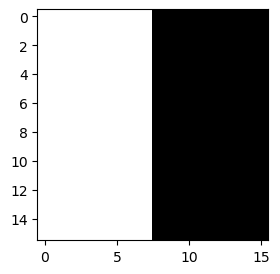

In [31]:
plt.imshow(img0.reshape(16,16),cmap="gray")

- 0.1이 흰색, 0이 검정색

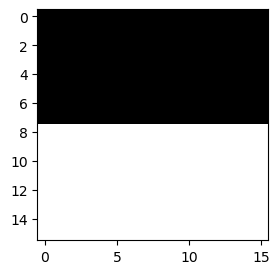

In [32]:
plt.imshow(img1.reshape(16,16),cmap="gray")

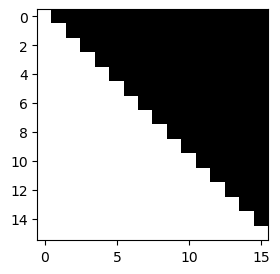

In [33]:
plt.imshow(img2.reshape(16,16),cmap="gray")

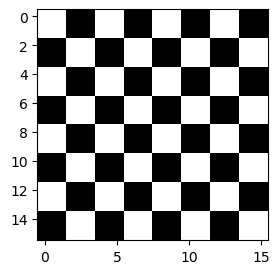

In [34]:
plt.imshow(img3.reshape(16,16),cmap="gray")

In [35]:
img3.shape

torch.Size([1, 1, 16, 16])

In [36]:
img3.reshape(16,16).shape

torch.Size([16, 16])

In [37]:
img3.squeeze().shape # 차원이 1인것은 줄어드는 method

torch.Size([16, 16])

)🗣️

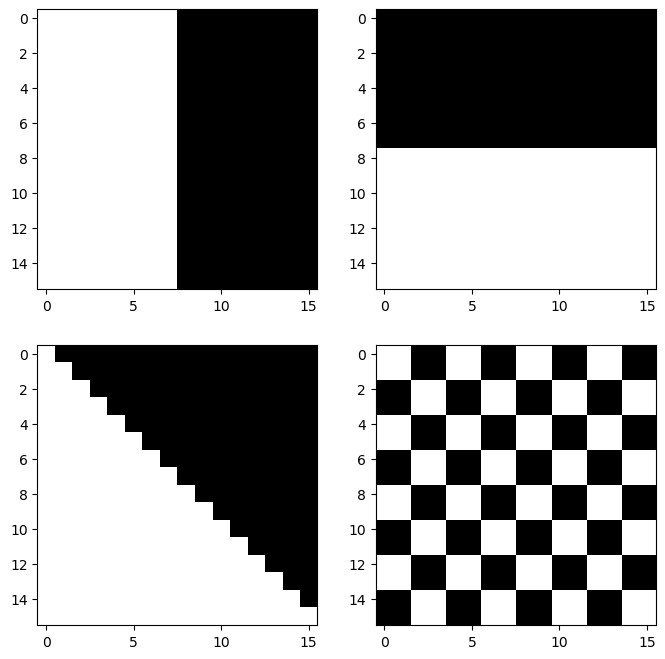

In [38]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(img0.squeeze(),cmap="gray")
axs[0][1].imshow(img1.squeeze(),cmap="gray")
axs[1][0].imshow(img2.squeeze(),cmap="gray")
axs[1][1].imshow(img3.squeeze(),cmap="gray")

In [39]:
imgs = torch.concat([img0,img1,img2,img3],axis=0)
imgs.shape

torch.Size([4, 1, 16, 16])

## B. vertical edge

🗣️(

```
x1 x2 x3 x4
x5 x6 x7 x8
x9 x10 x11 x12
x13 x14 x15 x16

[-1 1
 -1 1]

x1 x2
x5 x6
에 적용하면
-x1 x2
-x5 x6
다 더하면
-x1 + x2 -x5 + x6
= (x2-x1) + (x6-x5)
둘 씩 비교하여 변화가 있으면 1, 없으면 0

예시)
0 0 1 1
0 0 1 1
0 0 1 1
0 0 1 1
적용 후
0 1 0
0 1 0
0 1 0

확장)
0 0 0 1 1 1
0 0 0 1 1 1
0 0 0 1 1 1
0 0 0 1 1 1
0 0 0 1 1 1
0 0 0 1 1 1
적용 후
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
0 0 1 0 0
```

In [64]:
v_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=2,
    bias=False
)

In [65]:
v_conv.weight.data = torch.tensor([[[
    [-1.0, 1.0],
    [-1.0, 1.0]
]]])

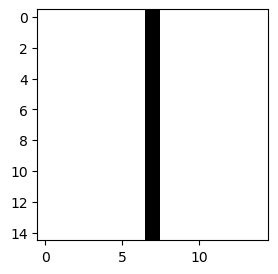

In [66]:
plt.imshow(v_conv(img0).squeeze().data, cmap="gray")

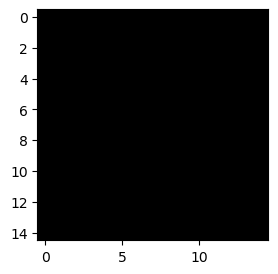

In [67]:
plt.imshow(v_conv(img1).squeeze().data, cmap="gray")

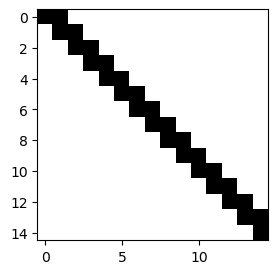

In [68]:
plt.imshow(v_conv(img2).squeeze().data, cmap="gray")

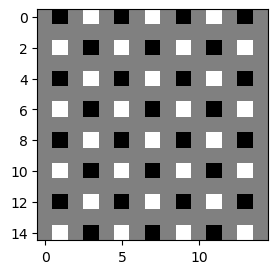

In [69]:
plt.imshow(v_conv(img3).squeeze().data, cmap="gray")

- 회색: 값 변화 X, 검정색: 흰색->검정색, 흰색: 검정색->흰색
- 이동평균과 kernel_size를 맞춰주면 밑의 코드와 같음

)🗣️

In [85]:
v_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
    bias=False
)

In [86]:
v_conv.weight.data = torch.tensor([[[
    [ 0, 0, 0, 0],
    [ 0, 1.0, -1.0, 0],
    [0, 1.0, -1.0, 0],
    [ 0, 0, 0, 0]
]]])

> 이 `v_conv`는 좌우방향의 픽셀변화, 즉 수직 방향의 엣지(vertical edge)를 감지하는데 적절하다. 

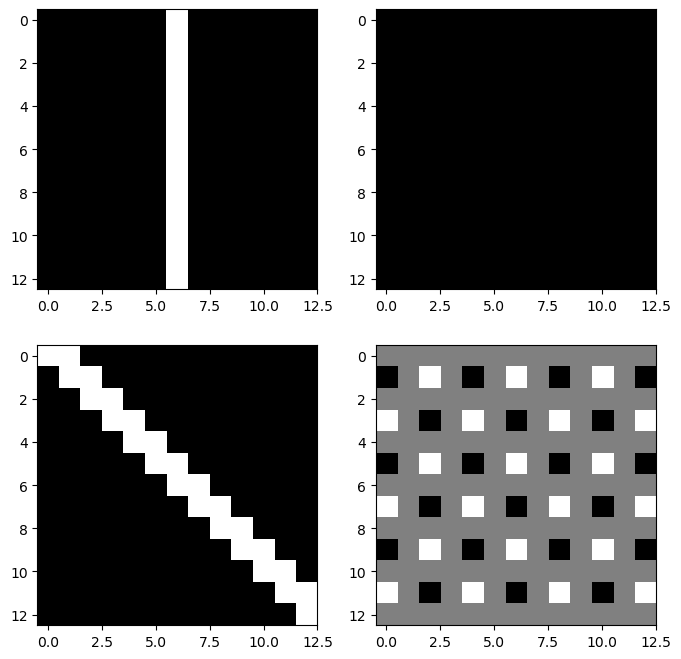

In [87]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(v_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(v_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(v_conv(imgs)[2].squeeze().data,cmap="gray")
axs[1][1].imshow(v_conv(imgs)[3].squeeze().data,cmap="gray")

🗣️ 왼쪽과 오른쪽을 비교하여 edge를 걸었더니 모두 0이면 위아래임을 알 수 있음 

## C. horizontal edge

✍️(

```
x1 x2 x3 x4
x5 x6 x7 x8
x9 x10 x11 x12
x13 x14 x15 x16

[-1 -1
  1 1]

x1 x2
x5 x6
에 적용하면
-x1 -x2
 x5 x6
다 더하면
-x1 - x2 + x5 + x6
= (x5-x1) + (x6-x2)
둘 씩 비교하여 변화가 있으면 1, 없으면 0

예시)
1 1 1 1
1 1 1 1
0 0 0 0
0 0 0 0
적용 후
0 0 0
1 1 1
0 0 0

확장)
1 1 1 1 1 1
1 1 1 1 1 1
1 1 1 1 1 1
0 0 0 0 0 0
0 0 0 0 0 0
0 0 0 0 0 0
적용 후
0 0 0 0 0
0 0 0 0 0
1 1 1 1 1
0 0 0 0 0
0 0 0 0 0
```

)✍️

In [61]:
h_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
    bias=False
)

In [62]:
h_conv.weight.data = torch.tensor([[[
    [ 0, 0, 0, 0],
    [ 0, -1.0, -1.0, 0],
    [0, 1.0, 1.0, 0],
    [ 0, 0, 0, 0]
]]])

> 이 `h_conv`는 위아레 방향의 픽셀변화, 즉 수평엣지(horizontal edge)를 감지하는데 적절하다. 

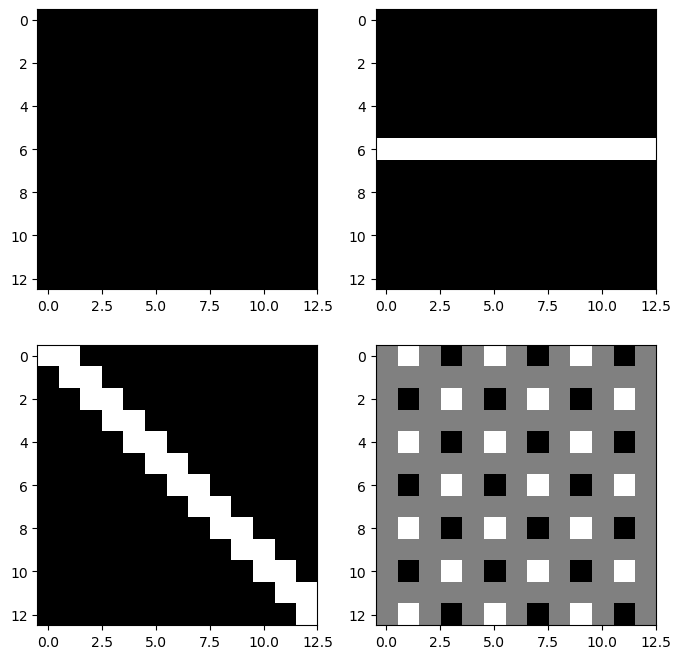

In [63]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(h_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(h_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(h_conv(imgs)[2].squeeze().data,cmap="gray")
axs[1][1].imshow(h_conv(imgs)[3].squeeze().data,cmap="gray")

🗣️ 위쪽과 아래쪽을 비교하여 edge를 걸었더니 모두 0이면 좌우임을 알 수 있음 

## D. 이동평균

🗣️(

In [40]:
m_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
)
m_conv.weight.data = m_conv.weight.data*0 + 1/16 # 16개 pixel에 대한 평균
m_conv.bias.data = m_conv.bias.data*0

In [41]:
m_conv(img0).shape

torch.Size([1, 1, 13, 13])

In [42]:
m_conv(img0).squeeze().shape

torch.Size([13, 13])

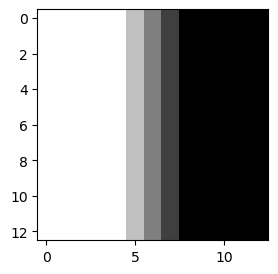

In [43]:
plt.imshow(m_conv(img0).squeeze().data, cmap="gray")

- 평균은 smoothing 하는 효과

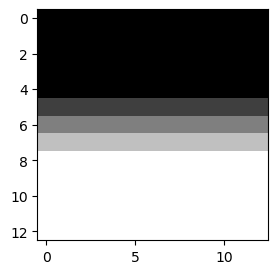

In [44]:
plt.imshow(m_conv(img1).squeeze().data, cmap="gray")

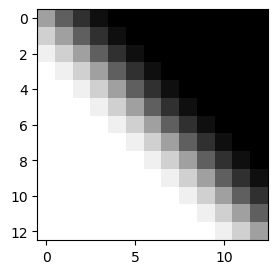

In [45]:
plt.imshow(m_conv(img2).squeeze().data, cmap="gray")

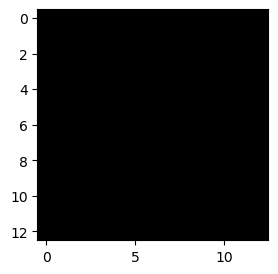

In [46]:
plt.imshow(m_conv(img3).squeeze().data, cmap="gray")

- 평균은 회색 (검은 색으로 보이지만 아님)

In [47]:
m_conv(img3)

tensor([[[[0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0.0500, 0.0500],
          [0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500, 0.0500,
           0.0500, 0.0500, 0.0500, 0

In [49]:
# plt.imshow(m_conv(img3).squeeze().data*0, cmap="gray") # *0을 해도 검은 색으로 보임

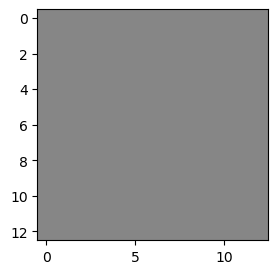

In [50]:
plt.imshow(m_conv(img3).squeeze().data, cmap="gray", vmin=-1, vmax=1) # 실질적으로 어떤 색인지 알려면

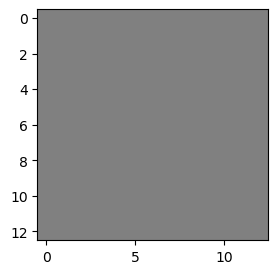

In [51]:
plt.imshow(m_conv(img3).squeeze().data*0, cmap="gray", vmin=-1, vmax=1) # 실질적으로 어떤 색인지 알려면

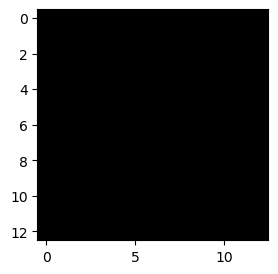

In [52]:
plt.imshow(m_conv(img3).squeeze().data*0-1, cmap="gray", vmin=-1, vmax=1) # 검정색

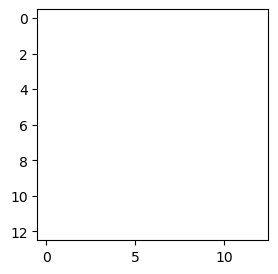

In [53]:
plt.imshow(m_conv(img3).squeeze().data*0+1, cmap="gray", vmin=-1, vmax=1) # 흰색

In [56]:
imgs.shape

torch.Size([4, 1, 16, 16])

In [57]:
m_conv(imgs).shape

torch.Size([4, 1, 13, 13])

)🗣️

In [54]:
m_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
)
m_conv.weight.data = m_conv.weight.data*0 + 1/16
m_conv.bias.data = m_conv.bias.data*0 - 0.05 # 진짜 0이 됨

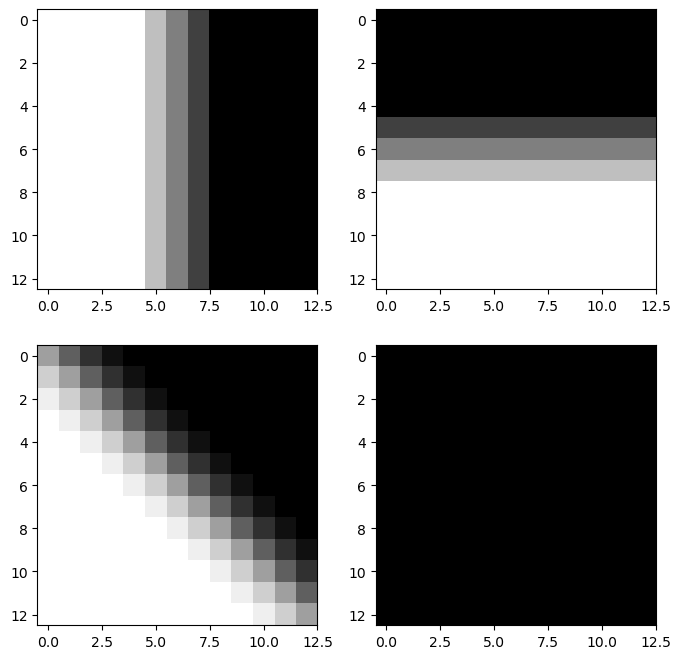

In [55]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(m_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(m_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(m_conv(imgs)[2].squeeze().data,cmap="gray")
axs[1][1].imshow(m_conv(imgs)[3].squeeze().data,cmap="gray")

- 🗣️
    - 이동평균을 했더니 0으로 나오면 체크무늬인 것을 알 수 있음
    - 3개의 필터에 모두 0이 안되면 대각선인 것을 알 수 있음

🗣️(

- 매우 다양한 조합 가능

In [70]:
m_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=6, # 6으로 변경
)
m_conv.weight.data = m_conv.weight.data*0 + 1/16
m_conv.bias.data = m_conv.bias.data*0 - 0.05

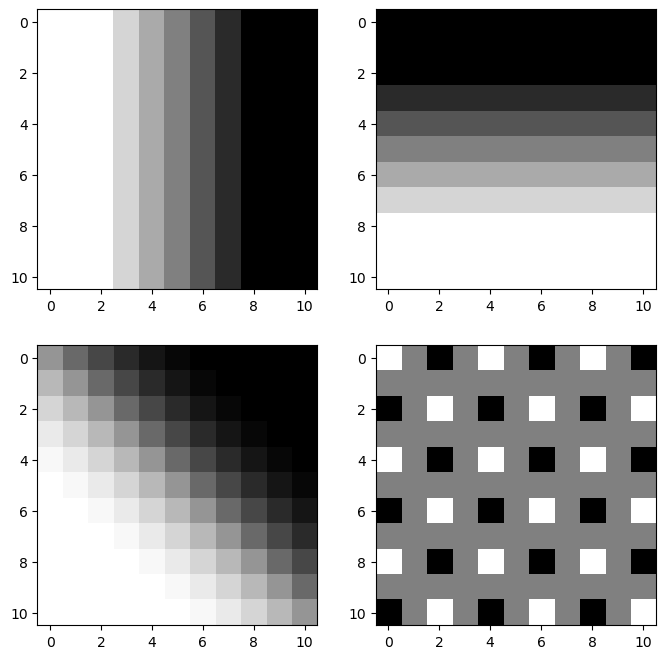

In [71]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(m_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(m_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(m_conv(imgs)[2].squeeze().data,cmap="gray")
axs[1][1].imshow(m_conv(imgs)[3].squeeze().data,cmap="gray")

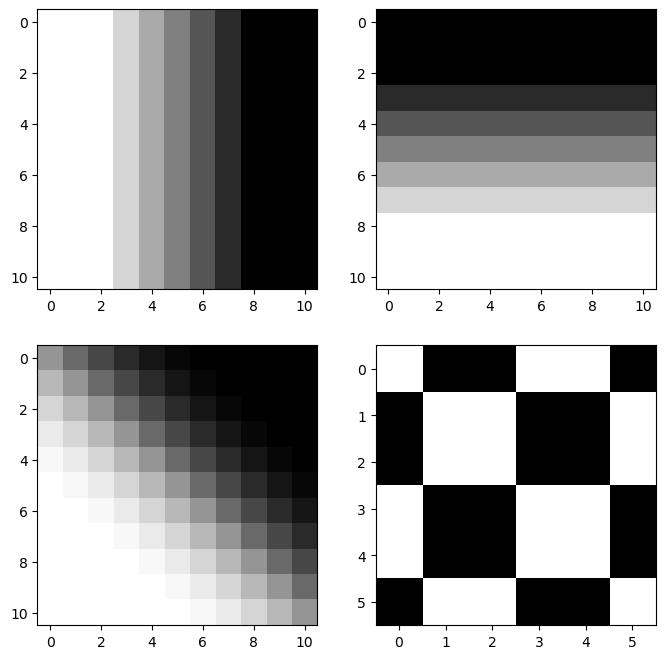

In [73]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(m_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(m_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(m_conv(imgs)[2].squeeze().data,cmap="gray")
axs[1][1].imshow(m_conv(m_conv(imgs))[3].squeeze().data,cmap="gray") # 한 번 더 걸면

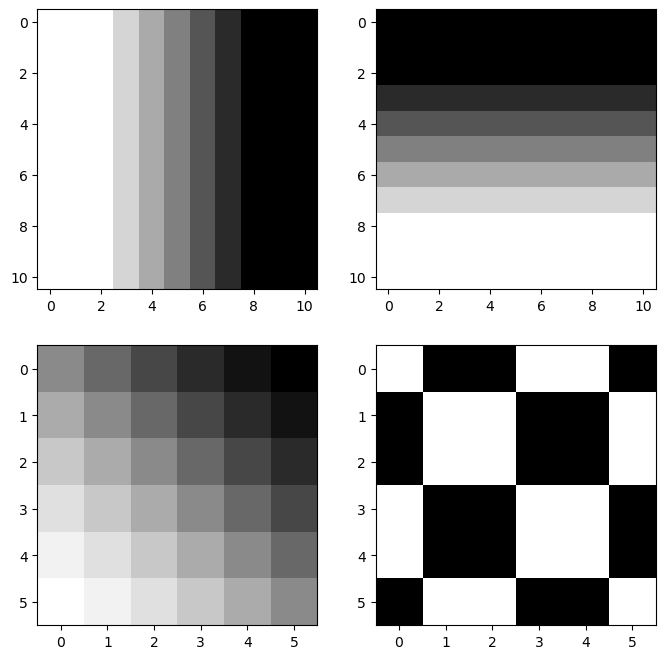

In [74]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(m_conv(imgs)[0].squeeze().data,cmap="gray")
axs[0][1].imshow(m_conv(imgs)[1].squeeze().data,cmap="gray")
axs[1][0].imshow(m_conv(m_conv(imgs))[2].squeeze().data,cmap="gray") # 이것도 한 번 더
axs[1][1].imshow(m_conv(m_conv(imgs))[3].squeeze().data,cmap="gray")

)🗣️

## E. (C,D,E) + relu + mp

🗣️(

In [76]:
m_conv = torch.nn.Conv2d(
    in_channels=1,
    out_channels=1,
    kernel_size=4,
)
m_conv.weight.data = m_conv.weight.data*0 + 1/16
m_conv.bias.data = m_conv.bias.data*0 - 0.05 # 진짜 0이 됨

In [77]:
m_conv(imgs).shape

torch.Size([4, 1, 13, 13])

In [79]:
mp = torch.nn.MaxPool2d(kernel_size=13) # 13*13 중에 가장 큰 값을 뽑음

In [81]:
mp(m_conv(imgs)) # 마지막만 0이 됨

tensor([[[[5.0000e-02]]],


        [[[5.0000e-02]]],


        [[[5.0000e-02]]],


        [[[9.3132e-10]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [83]:
mp(h_conv(imgs)) # 처음만 0이 됨

tensor([[[[0.0000]]],


        [[[0.2000]]],


        [[[0.1000]]],


        [[[0.2000]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [89]:
mp(v_conv(imgs)) # 두번째만 0이 됨

tensor([[[[0.2000]]],


        [[[0.0000]]],


        [[[0.1000]]],


        [[[0.2000]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

- 여기서는 큰 의미는 없지만 relu도 같이 통과를 시키면 결과가 다양해짐

In [90]:
relu = torch.nn.ReLU()

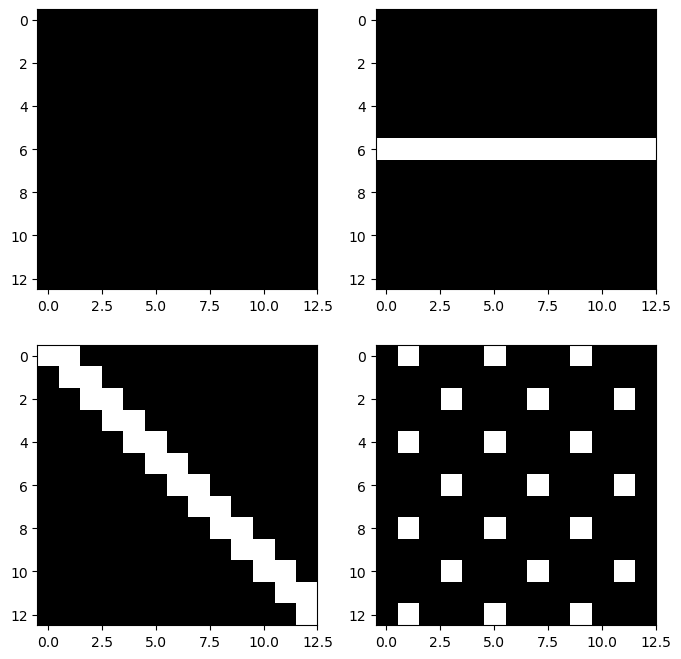

In [91]:
fig, axs = plt.subplots(2,2)
fig.set_figheight(8)
fig.set_figwidth(8)
axs[0][0].imshow(relu(h_conv(imgs))[0].squeeze().data,cmap="gray")
axs[0][1].imshow(relu(h_conv(imgs))[1].squeeze().data,cmap="gray")
axs[1][0].imshow(relu(h_conv(imgs))[2].squeeze().data,cmap="gray")
axs[1][1].imshow(relu(h_conv(imgs))[3].squeeze().data,cmap="gray")

)🗣️

In [92]:
relu = torch.nn.ReLU()
mp = torch.nn.MaxPool2d(kernel_size=13)

In [93]:
mp(relu(v_conv(imgs)))

tensor([[[[0.2000]]],


        [[[0.0000]]],


        [[[0.1000]]],


        [[[0.2000]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [94]:
mp(relu(h_conv(imgs)))

tensor([[[[0.0000]]],


        [[[0.2000]]],


        [[[0.1000]]],


        [[[0.2000]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

In [95]:
mp(relu(m_conv(imgs)))

tensor([[[[5.0000e-02]]],


        [[[5.0000e-02]]],


        [[[5.0000e-02]]],


        [[[9.3132e-10]]]], grad_fn=<MaxPool2DWithIndicesBackward0>)

🗣️ 매우 많은 숫자들이 구분하기 용이한 숫자들로 요약됨

## F. 대충 이런 구조

🗣️(

```
이미지1->h->r->mp->0,??,??
      ->v->r->mp->
      ->m->r->mp

이미지1->(h,v,m)->r->mp->0,??,??
이미지2->(h,v,m)->r->mp->0,??,??
이미지3->(h,v,m)->r->mp->0,??,??
이미지4->(h,v,m)->r->mp->0,??,??
```

In [96]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,out_channels=3,kernel_size=4), # bias 사용
    torch.nn.ReLU(), # 다양해짐
    torch.nn.MaxPool2d(kernel_size=13),
    torch.nn.Flatten()
)

In [97]:
net[0].weight.shape

torch.Size([3, 1, 4, 4])

```
1,1,4,4 --> m_conv
1,1,4,4 --> h_conv
1,1,4,4 --> v_conv
3,1,4,4 --> conv
```

In [98]:
net[0].weight.data

tensor([[[[-0.0833, -0.0289, -0.2051, -0.2370],
          [-0.1144, -0.0212, -0.0276,  0.1908],
          [-0.1374, -0.1581, -0.0825, -0.1222],
          [-0.2006, -0.1606, -0.1211,  0.0583]]],


        [[[ 0.2180, -0.1371, -0.0198, -0.1251],
          [-0.0198, -0.0584,  0.1258,  0.0500],
          [ 0.0558, -0.0605, -0.1558,  0.2098],
          [ 0.0355, -0.0771,  0.0439,  0.0692]]],


        [[[ 0.2496, -0.0280, -0.1691, -0.2486],
          [-0.1302,  0.1365, -0.0934, -0.2321],
          [-0.0914,  0.2089, -0.1784,  0.1483],
          [ 0.1498,  0.0237,  0.2464,  0.0540]]]])

In [100]:
torch.concat(
    [v_conv.weight.data,
     h_conv.weight.data,
     m_conv.weight.data],axis=0).shape

torch.Size([3, 1, 4, 4])

In [101]:
net[0].weight.data = torch.concat(
    [v_conv.weight.data,
     h_conv.weight.data,
     m_conv.weight.data],axis=0)
net[0].weight.data

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  1.0000, -1.0000,  0.0000],
          [ 0.0000,  1.0000, -1.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000, -1.0000, -1.0000,  0.0000],
          [ 0.0000,  1.0000,  1.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000]]],


        [[[ 0.0625,  0.0625,  0.0625,  0.0625],
          [ 0.0625,  0.0625,  0.0625,  0.0625],
          [ 0.0625,  0.0625,  0.0625,  0.0625],
          [ 0.0625,  0.0625,  0.0625,  0.0625]]]])

In [102]:
net[0].bias.data

tensor([ 0.1274,  0.2041, -0.0989])

In [103]:
net[0].bias.data = torch.tensor([0.0,0.0, -0.05])

In [104]:
net(imgs)

tensor([[2.0000e-01, 0.0000e+00, 5.0000e-02],
        [0.0000e+00, 2.0000e-01, 5.0000e-02],
        [1.0000e-01, 1.0000e-01, 5.0000e-02],
        [2.0000e-01, 2.0000e-01, 9.3132e-10]], grad_fn=<ViewBackward0>)

```
두번째 0
첫번째 0
0 없음
네번째 0
```

)🗣️

In [105]:
net = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,out_channels=3,kernel_size=4), # bias 사용
    torch.nn.ReLU(), # 다양해짐
    torch.nn.MaxPool2d(kernel_size=13),
    torch.nn.Flatten()
)
net[0].weight.data = torch.concat(
    [v_conv.weight.data,
     h_conv.weight.data,
     m_conv.weight.data],axis=0)
net[0].bias.data = torch.tensor([0.0,0.0, -0.05])

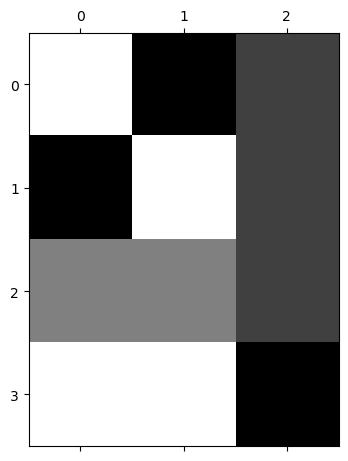

In [106]:
plt.matshow(net(imgs).data,cmap="gray")

In [995]:
net(imgs).shape

torch.Size([4, 3])

🗣️ 4개의 이미지를 각각 3개로 특징을 요약

> 출력은 (n,3)으로 정리되어서 나온다. 이 시점부터는 더 이상 이미지가 입력이라고 생각하지 않아도 되고, 단순히 (n, 3) 크기의 숫자 데이터가 입력으로 주어진 것처럼 보면 된다.
즉 이제부터는 이 (n,3) 데이터를 입력으로 받는 신경망을 설계하면 된다.

## G. mp의 역할?

`-` 샘플이미지 

In [107]:
img = torch.zeros((1, 1, 16, 16))
triangle_size = 4
for i in range(triangle_size):
    for j in range(triangle_size):
        if j <= i:  # 아래 방향 직각삼각형 (왼쪽 위 꼭짓점 기준)
            img[0, 0, i, j] = 1.0

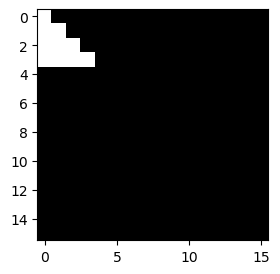

In [108]:
plt.imshow(img.squeeze(),cmap="gray")

`-` mp1 회

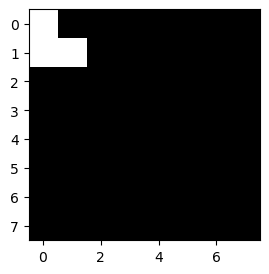

In [109]:
mp = torch.nn.MaxPool2d(kernel_size=2)
plt.imshow(mp(img).squeeze(),cmap="gray")

🗣️ 이미지가 1/4로 줄어듦

`-` mp 2~4회 

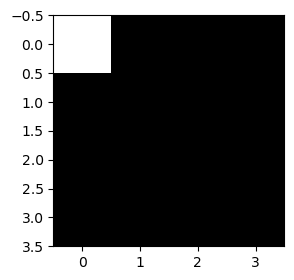

In [110]:
mp = torch.nn.MaxPool2d(kernel_size=2)
plt.imshow(mp(mp(img)).squeeze(),cmap="gray")

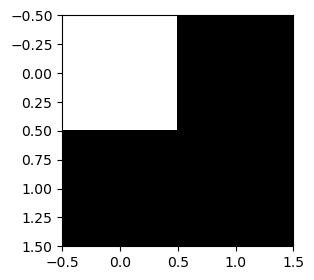

In [111]:
mp = torch.nn.MaxPool2d(kernel_size=2)
plt.imshow(mp(mp(mp(img))).squeeze(),cmap="gray")

`-` maxpooling은 이미지를 "캐리커처화" 한다고 비유할 수 있음. 디테일은 버리고, 중요한 특징만 뽑아서 과장되게 요약한다. 

- 🗣️ 사이즈를 줄이려고 사용, 중요한 정보도 손실 X

```
CNN
--> 2d // flatten (conv(특징)-relu(특징다변화)-maxpooling(요약))
--> 1d // 단순신경망
```

# 5. FashionMNIST 📝

`-` 데이터

In [112]:
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
train_dataset = torch.utils.data.Subset(train_dataset, range(5000))
to_tensor = torchvision.transforms.ToTensor()
X = torch.stack([to_tensor(img) for img, lbl in train_dataset]).to("cuda:0")
y = torch.tensor([lbl for img, lbl in train_dataset])
y = torch.nn.functional.one_hot(y).float().to("cuda:0")

🗣️(

In [113]:
X.shape

torch.Size([5000, 1, 28, 28])

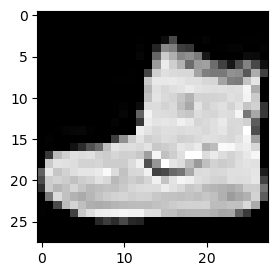

In [114]:
plt.imshow(X[0].squeeze().cpu(),cmap="gray") # cuda에 있으므로 cpu로 보냄

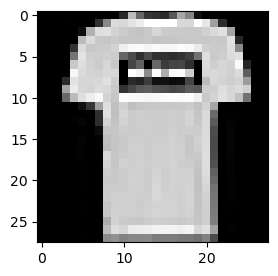

In [115]:
plt.imshow(X[1].squeeze().cpu(),cmap="gray") # 위와 구분될 수 있을 것 같음

)🗣️

`-` 2d를 처리하고 flatten하는 네트워크 

- 🗣️
    - 16: 잘 모르겠지만 16개의 특징을 뽑아서 분류하고 싶음 (안 되면 늘리면 됨)
    - kernel_size도 처음은 크게 크게 보며 특징을 뽑으려고 함 (해보면서 나중에 바꿔가면 됨)
    - MaxPool2d(kernel_size=2) 커지면 심하게 요약 (위의 F 경우: 13)

In [116]:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    # torch.nn.Flatten()
).to("cuda:0")

In [117]:
net1(X).shape

torch.Size([5000, 16, 12, 12])

In [118]:
net1 = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),
    torch.nn.ReLU(),
    torch.nn.MaxPool2d(kernel_size=2),
    torch.nn.Flatten()
).to("cuda:0")

In [119]:
net1(X).shape

torch.Size([5000, 2304])

In [120]:
16*12*12

2304

> 출력은 (n,2304)으로 정리되어서 나온다. 이 시점부터는 더 이상 이미지가 입력이라고 생각하지 않아도 되고, 단순히 (n, 2304) 크기의 숫자 데이터가 입력으로 주어진 것처럼 보면 된다. 즉 이제부터는 이 (n,2304) 데이터를 입력으로 받는 신경망을 설계하면 된다.

`-` 1d를 처리하는 네트워크

🗣️(

In [122]:
y.shape

torch.Size([5000, 10])

```python
net2= torch.nn.Sequential(
    torch.nn.Linear(2304,512),
    torch.nn.ReLU(),
    torch.nn.Linear(512,10)
).to("cuda:0")
```

- 10으로 받는게 부담스러우면 위 코드처럼 해도 됨

In [124]:
net1(X).shape

torch.Size([5000, 2304])

)🗣️

In [125]:
net2= torch.nn.Sequential(
    torch.nn.Linear(2304,10), # 클래스가 10개
).to("cuda:0")

In [126]:
net2(net1(X)).shape

torch.Size([5000, 10])

`-` 두 네트워크를 결합 

In [127]:
net = torch.nn.Sequential(
    net1,
    net2
)
net(X).shape

torch.Size([5000, 10])

`-` 최종적인 코드 

In [129]:
net = torch.nn.Sequential(
    net1,
    net2
)
loss_fn = torch.nn.CrossEntropyLoss() # y가 원핫인코딩
optimizr=torch.optim.Adam(net.parameters())
#---#
for epoc in range(100):
    #1
    netout = net(X) # 로짓
    #2
    loss = loss_fn(netout,y)
    #3
    loss.backward()
    #4 
    optimizr.step()
    optimizr.zero_grad()

In [131]:
(net(X).argmax(axis=1) == y.argmax(axis=1)).float().mean()

tensor(0.8792, device='cuda:0')

🗣️(

- 예측을 더 높이려면 여러가지 테크닉을 쓰면 됨

In [128]:
y

tensor([[0., 0., 0.,  ..., 0., 0., 1.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [130]:
net(X).argmax(axis=1) # 예측을 보려면

tensor([9, 0, 0,  ..., 5, 8, 3], device='cuda:0')

)🗣️